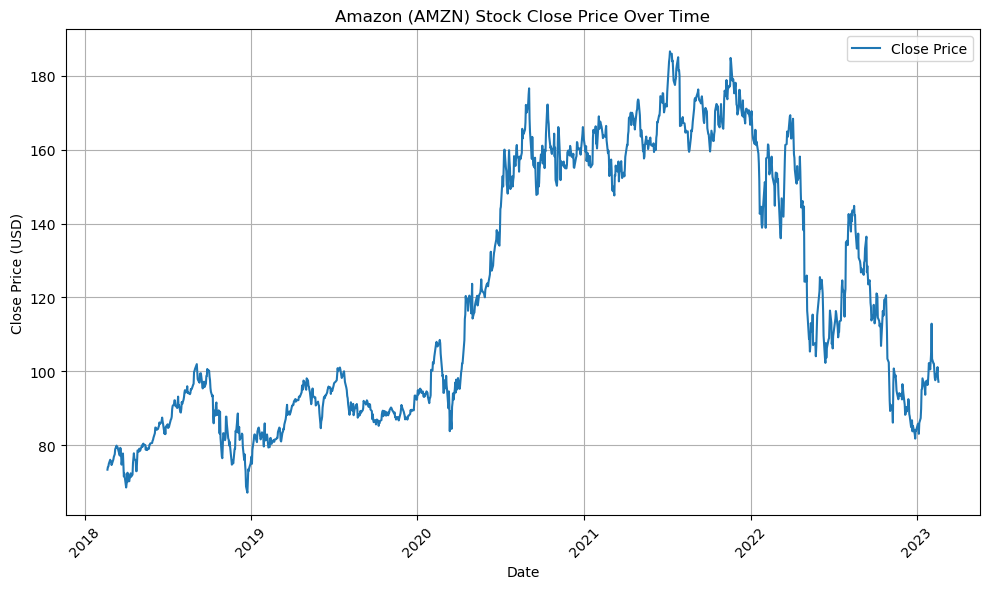

ADF Test Results for Close Price:
ADF Statistic: -1.6578089913331724
p-value: 0.4529710546516677
The series is likely non-stationary (Fail to reject H0).

KPSS Test Results for Close Price:

KPSS Statistic: 2.968777228334453
p-value: 0.01
The series is likely non-stationary (Reject H0).


C:\Users\MrLaptop\AppData\Local\Temp\ipykernel_10620\4266171811.py:40: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c')


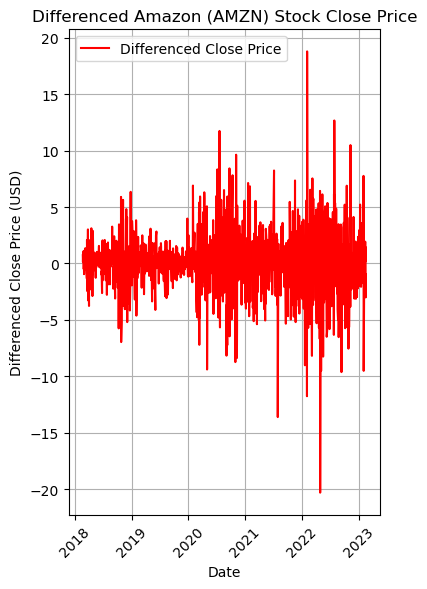

ADF Test Results for Differenced Close Price:
ADF Statistic: -36.25077933242776
p-value: 0.0
The series is likely stationary (Reject H0).

KPSS Test Results for Differenced Close Price:

KPSS Statistic: 0.23664626043873974
p-value: 0.1
The series is likely stationary (Fail to reject H0).


C:\Users\MrLaptop\AppData\Local\Temp\ipykernel_10620\4266171811.py:40: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression='c')


<Figure size 400x600 with 0 Axes>

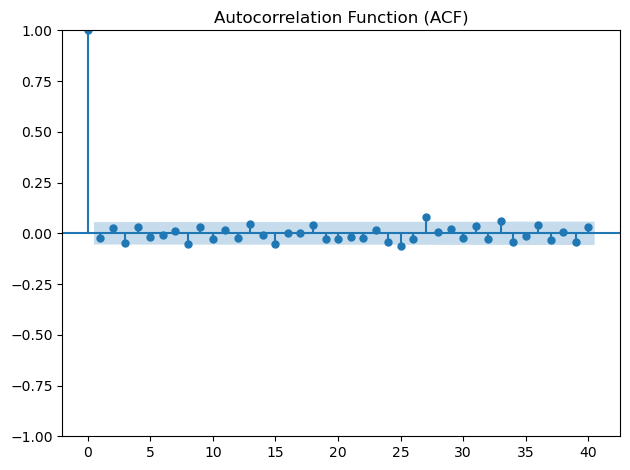

<Figure size 1000x600 with 0 Axes>

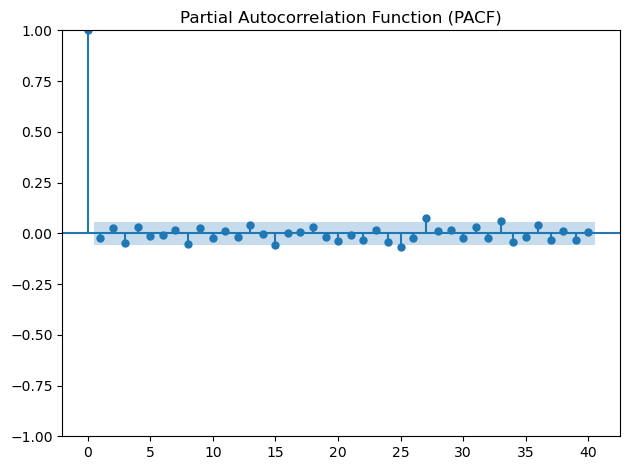

C:\Users\MrLaptop\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MrLaptop\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MrLaptop\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MrLaptop\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\MrLaptop\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible start

                               SARIMAX Results                                
Dep. Variable:             Close_diff   No. Observations:                 1258
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -3062.815
Date:                Fri, 11 Apr 2025   AIC                           6133.629
Time:                        02:29:56   BIC                           6154.178
Sample:                             0   HQIC                          6141.352
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.076      0.247      0.805      -0.131       0.169
ar.L1         -0.6795      0.242     -2.813      0.005      -1.153      -0.206
ma.L1          0.6440      0.251      2.563      0.0

C:\Users\MrLaptop\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\MrLaptop\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


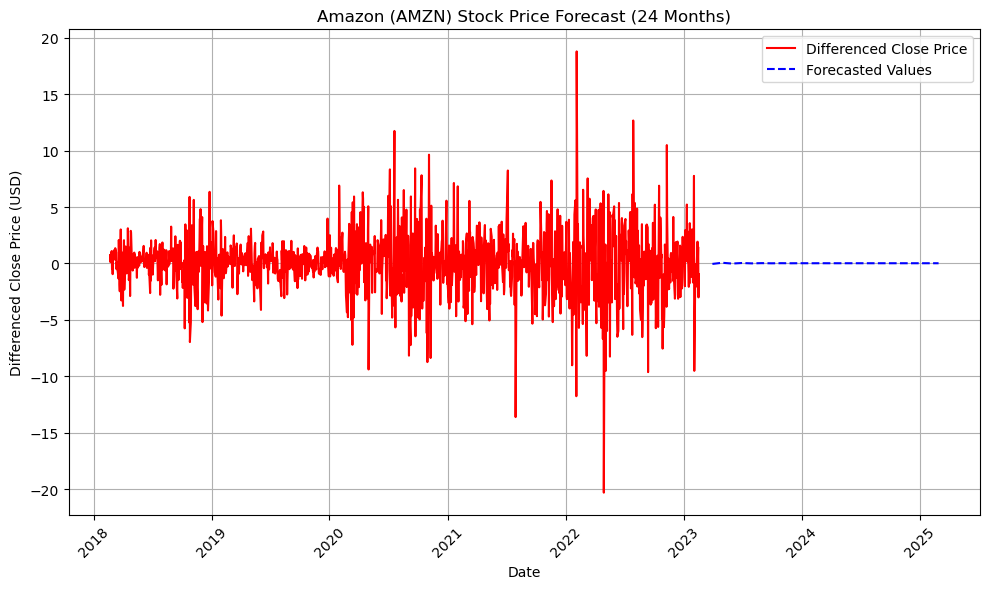

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset
file_path = r'C:\Users\MrLaptop\Desktop\AMZN.csv'
data = pd.read_csv(file_path)

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Initial plot: Close Price over time
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.title('Amazon (AMZN) Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Time series analysis: ADF test
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] <= 0.05:
        print("The series is likely stationary (Reject H0).")
    else:
        print("The series is likely non-stationary (Fail to reject H0).")

# KPSS test for stationarity
def kpss_test(series):
    result = kpss(series, regression='c')
    print("\nKPSS Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] <= 0.05:
        print("The series is likely non-stationary (Reject H0).")
    else:
        print("The series is likely stationary (Fail to reject H0).")

# Perform ADF and KPSS tests on 'Close' price
print("ADF Test Results for Close Price:")
adf_test(data['Close'])

print("\nKPSS Test Results for Close Price:")
kpss_test(data['Close'])

# Make the data stationary by differencing
data['Close_diff'] = data['Close'].diff()
data_diff = data.dropna(subset=['Close_diff'])

# Plot the differenced data
plt.figure(figsize=(4, 6))
plt.plot(data_diff['Date'], data_diff['Close_diff'], label='Differenced Close Price', color='red')
plt.title('Differenced Amazon (AMZN) Stock Close Price')
plt.xlabel('Date')
plt.ylabel('Differenced Close Price (USD)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Re-check stationarity after differencing
print("ADF Test Results for Differenced Close Price:")
adf_test(data_diff['Close_diff'])

print("\nKPSS Test Results for Differenced Close Price:")
kpss_test(data_diff['Close_diff'])

# Plot ACF and PACF to find optimal p and q values
plt.figure(figsize=(4, 6))
plot_acf(data_diff['Close_diff'], lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plot_pacf(data_diff['Close_diff'], lags=40)
plt.title('Partial Autocorrelation Function (PACF)')
plt.tight_layout()
plt.show()

# Define the ARMA model (ARIMA with d=0)
# Here, we'll use p=1, q=1 as an example. You can adjust it based on ACF and PACF results.
p = 1  # AR order
q = 1  # MA order

# Create the ARMA model (ARIMA with d=0)
model = ARIMA(data_diff['Close_diff'], order=(p, 0, q))

# Fit the model
model_fit = model.fit()

# Print the summary of the model
print(model_fit.summary())

# Test model performance: Forecast in-sample
in_sample_pred = model_fit.fittedvalues
mse = mean_squared_error(data_diff['Close_diff'], in_sample_pred)
print("\nIn-sample Mean Squared Error (MSE):", mse)

# Forecast 24 months into the future (assuming monthly data, so 24 months = 24 steps ahead)
forecast_steps = 24
forecast_values = model_fit.forecast(steps=forecast_steps)

# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(data_diff['Date'], data_diff['Close_diff'], label='Differenced Close Price', color='red')
forecast_dates = pd.date_range(start=data_diff['Date'].iloc[-1], periods=forecast_steps+1, freq='M')[1:]
plt.plot(forecast_dates, forecast_values, label='Forecasted Values', color='blue', linestyle='--')
plt.title('Amazon (AMZN) Stock Price Forecast (24 Months)')
plt.xlabel('Date')
plt.ylabel('Differenced Close Price (USD)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


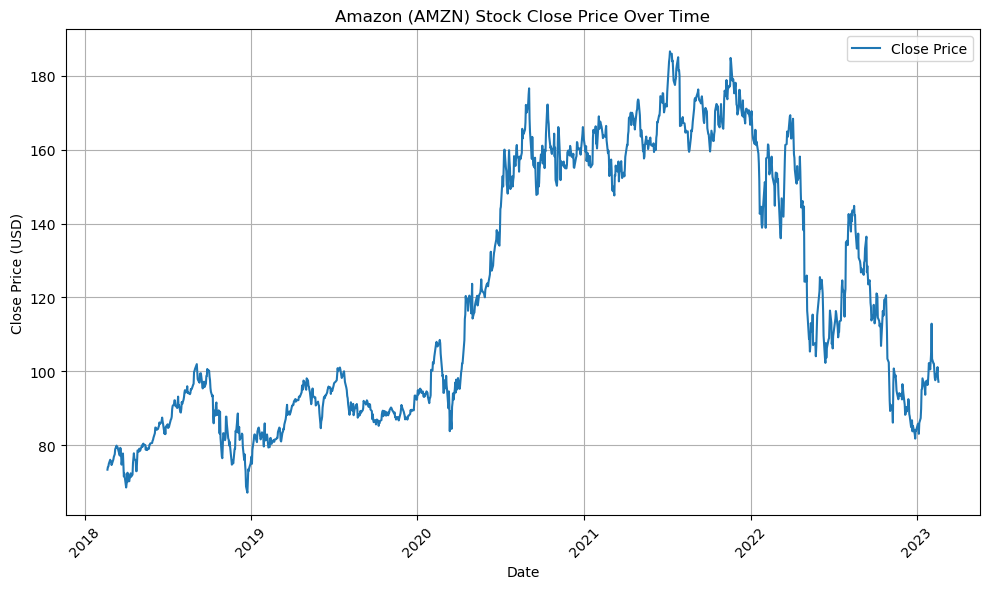

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset
file_path = r'C:\Users\MrLaptop\Desktop\AMZN.csv'
data = pd.read_csv(file_path)

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Initial plot: Close Price over time
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.title('Amazon (AMZN) Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] <= 0.05:
        print("The series is likely stationary (Reject H0).")
    else:
        print("The series is likely non-stationary (Fail to reject H0).")

# KPSS test for stationarity
def kpss_test(series):
    result = kpss(series, regression='c')
    print("\nKPSS Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] <= 0.05:
        print("The series is likely non-stationary (Reject H0).")
    else:
        print("The series is likely stationary (Fail to reject H0).")
        # Perform ADF and KPSS tests on 'Close' price
print("ADF Test Results for Close Price:")
adf_test(data['Close'])

print("\nKPSS Test Results for Close Price:")
kpss_test(data['Close'])


ADF Test Results for Close Price:
ADF Statistic: -1.6578089913331724
p-value: 0.4529710546516677
The series is likely non-stationary (Fail to reject H0).

KPSS Test Results for Close Price:

KPSS Statistic: 2.968777228334453
p-value: 0.01
The series is likely non-stationary (Reject H0).


C:\Users\MrLaptop\AppData\Local\Temp\ipykernel_10620\4256524405.py:12: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c')


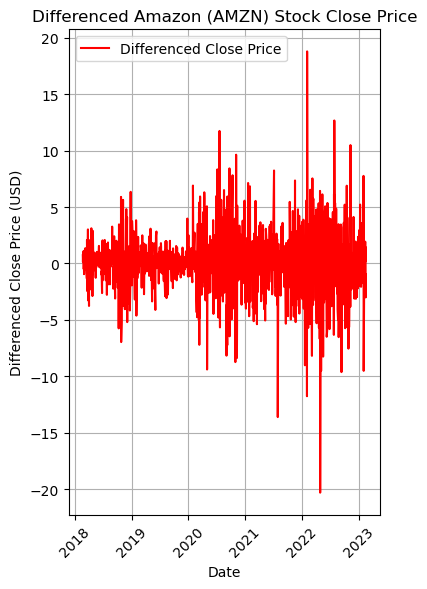

In [10]:
data['Close_diff'] = data['Close'].diff()
data_diff = data.dropna(subset=['Close_diff'])

# Plot the differenced data
plt.figure(figsize=(4, 6))
plt.plot(data_diff['Date'], data_diff['Close_diff'], label='Differenced Close Price', color='red')
plt.title('Differenced Amazon (AMZN) Stock Close Price')
plt.xlabel('Date')
plt.ylabel('Differenced Close Price (USD)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



ADF Test Results for Differenced Close Price:
ADF Statistic: -36.25077933242776
p-value: 0.0
The series is likely stationary (Reject H0).

KPSS Test Results for Differenced Close Price:

KPSS Statistic: 0.23664626043873974
p-value: 0.1
The series is likely stationary (Fail to reject H0).


C:\Users\MrLaptop\AppData\Local\Temp\ipykernel_10620\4256524405.py:12: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression='c')


<Figure size 400x600 with 0 Axes>

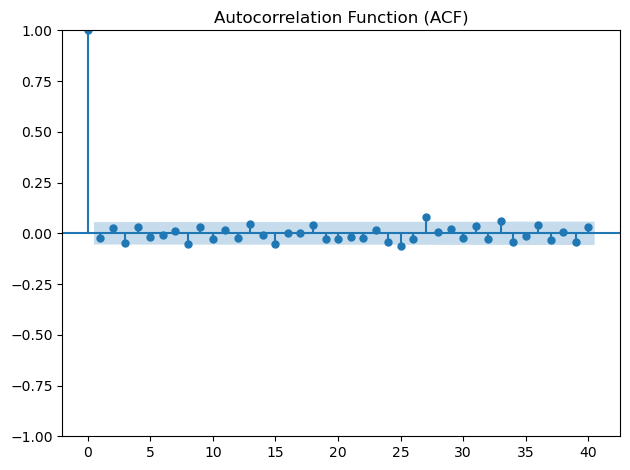

<Figure size 1000x600 with 0 Axes>

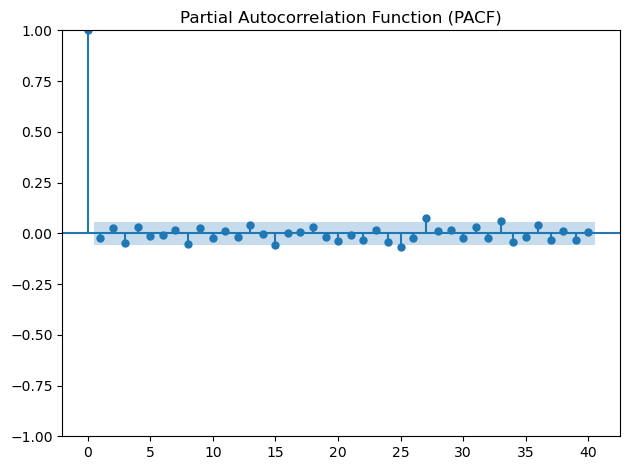

In [11]:
# Re-check stationarity after differencing
print("ADF Test Results for Differenced Close Price:")
adf_test(data_diff['Close_diff'])

print("\nKPSS Test Results for Differenced Close Price:")
kpss_test(data_diff['Close_diff'])

# Plot ACF and PACF to find optimal p and q values
plt.figure(figsize=(4, 6))
plot_acf(data_diff['Close_diff'], lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plot_pacf(data_diff['Close_diff'], lags=40)
plt.title('Partial Autocorrelation Function (PACF)')
plt.tight_layout()
plt.show()

C:\Users\MrLaptop\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MrLaptop\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MrLaptop\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MrLaptop\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\MrLaptop\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible start

                               SARIMAX Results                                
Dep. Variable:             Close_diff   No. Observations:                 1258
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -3062.815
Date:                Fri, 11 Apr 2025   AIC                           6133.629
Time:                        02:32:03   BIC                           6154.178
Sample:                             0   HQIC                          6141.352
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.076      0.247      0.805      -0.131       0.169
ar.L1         -0.6795      0.242     -2.813      0.005      -1.153      -0.206
ma.L1          0.6440      0.251      2.563      0.0

C:\Users\MrLaptop\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\MrLaptop\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


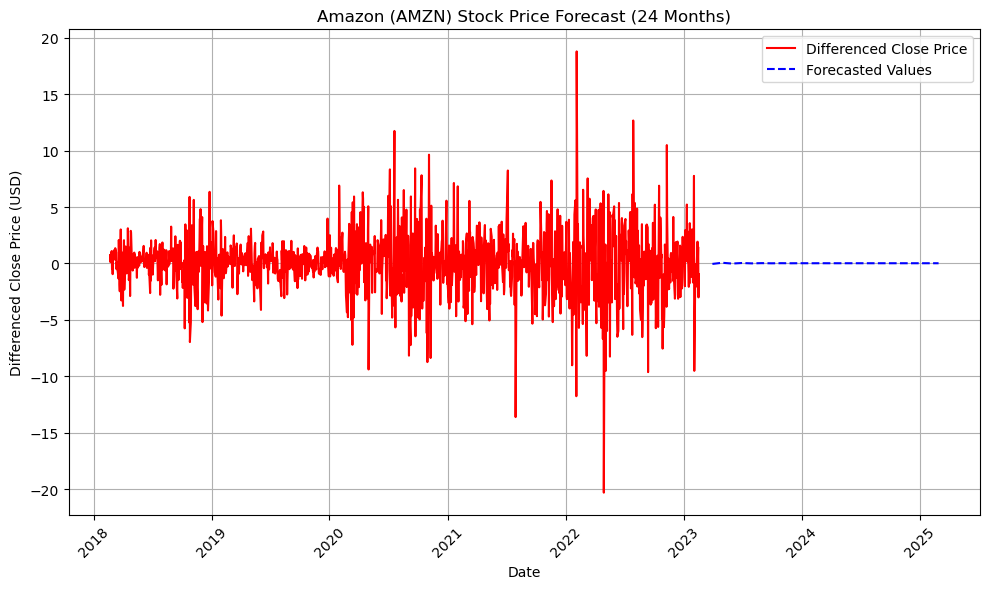

In [12]:
# Define the ARMA model (ARIMA with d=0)
# Here, we'll use p=1, q=1 as an example. You can adjust it based on ACF and PACF results.
p = 1  # AR order
q = 1  # MA order

# Create the ARMA model (ARIMA with d=0)
model = ARIMA(data_diff['Close_diff'], order=(p, 0, q))

# Fit the model
model_fit = model.fit()

# Print the summary of the model
print(model_fit.summary())

# Test model performance: Forecast in-sample
in_sample_pred = model_fit.fittedvalues
mse = mean_squared_error(data_diff['Close_diff'], in_sample_pred)
print("\nIn-sample Mean Squared Error (MSE):", mse)

# Forecast 24 months into the future (assuming monthly data, so 24 months = 24 steps ahead)
forecast_steps = 24
forecast_values = model_fit.forecast(steps=forecast_steps)

# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(data_diff['Date'], data_diff['Close_diff'], label='Differenced Close Price', color='red')
forecast_dates = pd.date_range(start=data_diff['Date'].iloc[-1], periods=forecast_steps+1, freq='M')[1:]
plt.plot(forecast_dates, forecast_values, label='Forecasted Values', color='blue', linestyle='--')
plt.title('Amazon (AMZN) Stock Price Forecast (24 Months)')
plt.xlabel('Date')
plt.ylabel('Differenced Close Price (USD)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\MrLaptop\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 112ms/step - loss: 0.1296 - val_loss: 0.0098
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0041 - val_loss: 0.0082
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0021 - val_loss: 0.0069
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0020 - val_loss: 0.0069
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0018 - val_loss: 0.0078
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0019 - val_loss: 0.0071
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0021 - val_loss: 0.0064
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0017 - val_loss: 0.0059
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0020 - val_loss: 0.0063
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0018 - val_loss: 0.0061
Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 126ms/step - loss: 0.0862 - val_loss: 0.0033
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 0

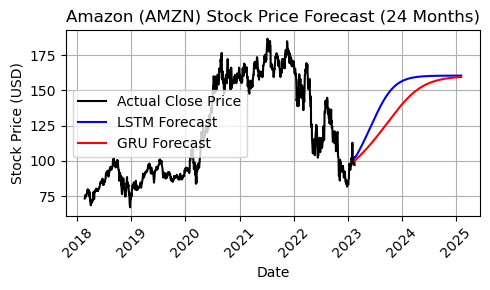

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step 
LSTM - MSE: 86.29385645848377, RMSE: 9.289448662783157, MAE: 7.305558702498372
GRU - MSE: 24.609164638673427, RMSE: 4.9607625057720135, MAE: 3.9347252476806633


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense
from keras.optimizers import Adam

# Load dataset
file_path = r'C:\Users\MrLaptop\Desktop\AMZN.csv'
data = pd.read_csv(file_path)

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Use only the 'Close' price for modeling
data_close = data[['Date', 'Close']]

# Data scaling using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_close['Close'].values.reshape(-1, 1))

# Prepare the data for training
def create_dataset(dataset, time_step=1):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

# Set time step
time_step = 60  # Using 60 days to predict the next day

# Create datasets for training and testing
X, y = create_dataset(scaled_data, time_step)

# Reshape X to be in the format [samples, time steps, features] for LSTM/GRU input
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM Model
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dense(units=1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

# Build the GRU Model
def build_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(units=50, return_sequences=True, input_shape=input_shape))
    model.add(GRU(units=50, return_sequences=False))
    model.add(Dense(units=1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

# Build and fit the LSTM model
lstm_model = build_lstm_model((X_train.shape[1], 1))
lstm_history = lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Build and fit the GRU model
gru_model = build_gru_model((X_train.shape[1], 1))
gru_history = gru_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Forecasting the next 24 months (assuming 30 days per month)
forecast_steps = 24 * 30  # 24 months, 30 days per month

# Function to forecast the future values
def forecast(model, X_input, forecast_steps):
    predictions = []
    current_input = X_input[-1]
    for _ in range(forecast_steps):
        prediction = model.predict(current_input.reshape(1, -1, 1))
        predictions.append(prediction[0][0])
        current_input = np.append(current_input[1:], prediction)
    return predictions

# Forecast 24 months into the future using both models
lstm_forecast = forecast(lstm_model, X_test, forecast_steps)
gru_forecast = forecast(gru_model, X_test, forecast_steps)

# Invert scaling to get actual price values
lstm_forecast_actual = scaler.inverse_transform(np.array(lstm_forecast).reshape(-1, 1))
gru_forecast_actual = scaler.inverse_transform(np.array(gru_forecast).reshape(-1, 1))

# Plot the results
plt.figure(figsize=(5,3))
plt.plot(data_close['Date'], data_close['Close'], label='Actual Close Price', color='black')
forecast_dates = pd.date_range(start=data_close['Date'].iloc[-1], periods=forecast_steps+1, freq='D')[1:]
plt.plot(forecast_dates, lstm_forecast_actual, label='LSTM Forecast', color='blue')
plt.plot(forecast_dates, gru_forecast_actual, label='GRU Forecast', color='red')
plt.title('Amazon (AMZN) Stock Price Forecast (24 Months)')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Compute evaluation metrics for LSTM and GRU
def compute_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    return mse, rmse, mae

# Evaluate models using test data
lstm_test_pred = lstm_model.predict(X_test)
gru_test_pred = gru_model.predict(X_test)

# Inverse scaling to get actual predictions for evaluation
lstm_test_pred_actual = scaler.inverse_transform(lstm_test_pred)
gru_test_pred_actual = scaler.inverse_transform(gru_test_pred)

# Compute evaluation metrics for LSTM
lstm_mse, lstm_rmse, lstm_mae = compute_metrics(scaler.inverse_transform(y_test.reshape(-1, 1)), lstm_test_pred_actual)
print(f"LSTM - MSE: {lstm_mse}, RMSE: {lstm_rmse}, MAE: {lstm_mae}")

# Compute evaluation metrics for GRU
gru_mse, gru_rmse, gru_mae = compute_metrics(scaler.inverse_transform(y_test.reshape(-1, 1)), gru_test_pred_actual)
print(f"GRU - MSE: {gru_mse}, RMSE: {gru_rmse}, MAE: {gru_mae}")
